
# Bitcoin Blockchain Lab Session
This lab session provides hands-on experience with interacting with the Bitcoin blockchain, including:
- Generating Bitcoin addresses
- Creating and signing transactions
- Broadcasting transactions
- Analyzing nodes in the Bitcoin network using APIs

**Prerequisites:**
- Basic Python knowledge
- Familiarity with the concepts of blockchain, Bitcoin, and cryptographic signatures

### Libraries Used:
- `python-bitcoinlib` or `ecc`, `helper`, and `tx` libraries from the GitHub repo
- `requests` for API calls to interact with the Bitcoin network

```bash
pip install bitcoinlib requests
```

# Fetching Bitcoin transaction and block data from API

We first fetch the latest block on the Testnet

The block header in Bitcoin contains essential metadata about a particular block on the blockchain. It is a compact summary of key information used to verify the block and link it to the blockchain. 

<img src="./fig/block.png" width="600">

In [24]:
# Import necessary libraries
import requests
from bitcoinlib.keys import Key
from bitcoinlib.services.services import Service

# --- Part 1: Connecting to the Bitcoin Testnet ---

# Blockstream Testnet API URL
testnet_api_url = "https://blockstream.info/testnet/api"

# Get the latest block hash
latest_block_url = f"{testnet_api_url}/blocks/tip/hash"
response = requests.get(latest_block_url)
latest_block_hash = response.text.strip()

# Fetch the details of the latest block
block_details_url = f"{testnet_api_url}/block/{latest_block_hash}"
block_response = requests.get(block_details_url)
block_data = block_response.json()

# Display block information
print(f"Latest Block Hash: {latest_block_hash}")
print(f"Block Height: {block_data['height']}")
print(f"Number of Transactions: {block_data['tx_count']}")
print(f"Block Size: {block_data['size']} bytes")
print(f"Timestamp: {block_data['timestamp']}")
print(f"Full Block Data: {block_data}")


Latest Block Hash: 00000000000000386f60126614efaba6bc8e0a558999ef3f2b8a9bc10da306ff
Block Height: 3104314
Number of Transactions: 63
Block Size: 17865 bytes
Timestamp: 1728598924
Full Block Data: {'id': '00000000000000386f60126614efaba6bc8e0a558999ef3f2b8a9bc10da306ff', 'height': 3104314, 'version': 943988736, 'timestamp': 1728598924, 'tx_count': 63, 'size': 17865, 'weight': 71352, 'merkle_root': 'f2377146176670610a4133f484eea5fa2c97896f798f0347c4c195d57bb6f18a', 'previousblockhash': '00000000000001f98dea6738a8b7636fd13e3455a41436b4bc18c855442f7dcc', 'mediantime': 1728598826, 'nonce': 1216445715, 'bits': 436469756, 'difficulty': 4194304.0}


We then make the query for the main net

In [25]:
# Import necessary libraries
import requests
from bitcoinlib.keys import Key
from bitcoinlib.services.services import Service

# --- Part 1: Connecting to the Bitcoin Testnet ---

# Blockstream Testnet API URL
testnet_api_url = "https://blockstream.info/api"

# Get the latest block hash
latest_block_url = f"{testnet_api_url}/blocks/tip/hash"
response = requests.get(latest_block_url)
latest_block_hash = response.text.strip()

# Fetch the details of the latest block
block_details_url = f"{testnet_api_url}/block/{latest_block_hash}"
block_response = requests.get(block_details_url)
block_data = block_response.json()

# Display block information
print(f"Latest Block Hash: {latest_block_hash}")
print(f"Block Height: {block_data['height']}")
print(f"Number of Transactions: {block_data['tx_count']}")
print(f"Block Size: {block_data['size']} bytes")
print(f"Timestamp: {block_data['timestamp']}")

Latest Block Hash: 0000000000000000000249ebe252c12a4da51160b7b2b70ff5f22f91aeb87cb8
Block Height: 865101
Number of Transactions: 5473
Block Size: 1541903 bytes
Timestamp: 1728599002


Given a blockhash we can retrieve the block header

In [4]:
import requests

# Blockstream Mainnet API URL
block_hash = "000000000000000000004e2d432344a196261dfe930fbf6b5640a1125be2e37c"
block_header_url = f"https://blockstream.info/api/block/{block_hash}/header"

# Fetch the block header (in hexadecimal)
response = requests.get(block_header_url)
block_header_hex = response.text.strip()

# Display the block header in hex format
print(f"Block Header (Hex): {block_header_hex}")

Block Header (Hex): 00e0002048eecbec1afc95f352c46f97ee50958e7d8859025d7602000000000000000000b13dc427de9a633c7f331fcd83d2837cd2a0dc13598da526c9c3a2888b556e47f6b90767cd0e03176abc5f59


### Proof of Work (POW)

Proof-of-work is the requirement that the hash of every block header in Bitcoin must be below a certain target. The target is a 256-bit number that is computed directly from the bits field (in our example above, e93c0118). 

<img src="./fig/target_above.png" width="800">

<img src="./fig/target_below.png" width="800">

We can check that this block header’s hash satisfies the proof-of-work as follows. First we calculate the target from the bock header:

<img src="./fig/bits.png" width="1200">

The bits field has two parts:

- Exponent (First Byte): This is "how far up" the coefficient is.
- Coefficient (Next 3 Bytes): This contains some precision from the full target value.
 
Benefits 
Why do we convert the target to bits?

The bits field saves on space in the block header.
So instead of storing the full 32-byte target, we store a 4-byte compact representation of it instead.



In [5]:
from helper import hash256
from helper import little_endian_to_int
bits = bytes.fromhex('e93c0118')
exponent = bits[-1]
coefficient = little_endian_to_int(bits[:-1])
target = coefficient * 256**(exponent - 3)
print('{:x}'.format(target).zfill(64))

0000000000000000013ce9000000000000000000000000000000000000000000


In [35]:
from helper import little_endian_to_int
bits = bytes.fromhex('e93c0118')
exponent = bits[-1]
coefficient = little_endian_to_int(bits[:-1]) 
target = coefficient*256**(exponent-3)
difficulty = 0xffff * 256**(0x1d-3) / target 
print(difficulty)

888171856257.3206


Targets are hard for human beings to comprehend. The target is the number that the hash must be below, but as humans, it’s not easy to see the difference between a 180- bit number and a 190-bit number. The first is a thousand times smaller, but from looking at targets, such large numbers are not easy to contextualize. To make different targets easier to compare, the concept of difficulty was introduced. Difficulty is inversely proportional to the target, to make comparisons easier.

The difficulty of Bitcoin at the genesis block was 1. This gives us context for how difficult mainnet currently is. The difficulty can be thought of as how much more diffi‐ cult mining is now than it was at the start. The mining difficulty in the preceding code is roughly 888 billion times harder than when Bitcoin started.

We can check that this block header’s hash satisfies the proof-of-work as follows:

In [27]:
from helper import little_endian_to_int
proof = little_endian_to_int(hash256(bytes.fromhex('020000208ec39428b17323fa0ddec8e887b4a7c53b8c0a0a220cfd0000000000000000005b0750fce0a889502d40508d39576821155e9c9e3f5c3157f961db38fd8b25be1e77a759e93c0118a4ffd71d')))
print(proof < target)


True


### Q: Repeat the verification considering one the latest blocks hash/header fetched from the API.

# Digression on consensus: how to write a simple code mimicking PoW consensus

In [28]:
import hashlib
import time

def proof_of_work(block_data, difficulty):
    nonce = 0
    prefix = '0' * difficulty  # The hash must start with 'difficulty' number of zeros.
    
    print("Mining block with difficulty level:", difficulty)
    
    while True:
        # Combine the block data with the nonce to get a new input
        input_data = block_data + str(nonce)
        # Compute the SHA-256 hash of the input data
        hash_result = hashlib.sha256(input_data.encode()).hexdigest()
        
        # Check if the hash meets the difficulty target (starts with a number of zeros)
        if hash_result.startswith(prefix):
            print(f"Block mined successfully! Nonce: {nonce}")
            print(f"Hash: {hash_result}")
            return nonce, hash_result
        
        print(f"Nonce: {nonce}, Hash: {hash_result}")

        # Increment the nonce and try again
        nonce += 1

Test the code with different difficulty parameters:

In [29]:
if __name__ == "__main__":
    block_data = "This is a sample block data"  # Data to be mined
    difficulty = 4  # Number of leading zeros required in the hash (can adjust difficulty here)
    
    start_time = time.time()
    nonce, mined_hash = proof_of_work(block_data, difficulty)
    end_time = time.time()

    print(f"Mining took {end_time - start_time} seconds")

Mining block with difficulty level: 4
Nonce: 0, Hash: 979533d8992583b8d090287f033eb87227ae4073a80d001b9b05b7ff9310dfa4
Nonce: 1, Hash: a1cd94966540ddeae7ec8ae18d1278fb166b865d46978f7843917a4f24cdc273
Nonce: 2, Hash: a9d1db4d34e5057a59b0871e0b9cc3cc9ae6a084f0967552ab6882fbd25138dd
Nonce: 3, Hash: 802310e89656d41df2d3eb162009a48b3d0d585c62e9664eff98357ecc76ff74
Nonce: 4, Hash: 6381ce197e02d96a66472d8259b63daa9b1dc18545c4a9ee453c6f7cfddbe0d2
Nonce: 5, Hash: c6912dad732c5518a6e03e53b55fe920f309f7b658010417e1a01c5f689220cc
Nonce: 6, Hash: 1e2d8ec9285ba5a9ea192f24d7bfc05989c65d562e230fb13b42f1117fca409c
Nonce: 7, Hash: 17a624acf1249dde1b747a075e69f05bb6798c6deab6e3e0b34f15e9edcdd57f
Nonce: 8, Hash: 30eb82d99aa000eac55963621cdf3a7bd0aeed549326cb2db7a8ee544817b532
Nonce: 9, Hash: e8c424110977b3ad0d1878b0239cf88357e3ff09a6a01e9210978145b4ebfe91
Nonce: 10, Hash: cdfa1b02fd04347be274e33afb595a85ba6b715442ba52233ae61fbbc641108f
Nonce: 11, Hash: c8e9610fb5e95b9324fc79cd0ce4c0a966d7b0564d7ac180fb2d9

## Querying the P2P network

- Bitcoin network is a peer-to-peer network of nodes that communicate with each other using the Bitcoin protoco without a central server.

<img src="./fig/p2p.png" width="800">

### Query the list of active nodes in the Bitcoin network

In [31]:
import requests

# URL for Bitnodes API
bitnodes_api_url = 'https://bitnodes.io/api/v1/snapshots/latest/'

# Make the API request
response = requests.get(bitnodes_api_url)

# Parse the response as JSON
data = response.json()

# Display the total number of nodes and some node details
total_nodes = data['total_nodes']
nodes = data['nodes']

print(f"Total nodes: {total_nodes}")
for node, info in list(nodes.items())[:5]:  # Display first 5 nodes
    print(f"Node IP: {node}, Node Info: {info}")

Total nodes: 18877
Node IP: 69.181.64.87:8333, Node Info: [70016, '/Satoshi:27.1.0/', 1728578047, 3081, 865101, 'c-69-181-64-87.hsd1.ca.comcast.net', 'Palo Alto', 'US', 37.4405, -122.1478, 'America/Los_Angeles', 'AS7922', 'COMCAST-7922']
Node IP: yavrpwjooghzygkqhualpezvidfcvyc65dapw3mtmh2bik5aa72qb2qd.onion:8333, Node Info: [70016, '/Satoshi:25.0.0/', 1728566668, 1037, 865101, None, None, None, 0.0, 0.0, None, 'TOR', 'Tor network']
Node IP: 135.181.109.135:8333, Node Info: [70015, '/Satoshi:0.20.1/', 1728599018, 1037, 865093, 'static.135.109.181.135.clients.your-server.de', 'Helsinki', 'FI', 60.1797, 24.9344, 'Europe/Helsinki', 'AS24940', 'Hetzner Online GmbH']
Node IP: a2gnppdzsphtrwoz5kpfxkybr6qs2ikv6hse3l677p44wgzzakbxthyd.onion:8333, Node Info: [70016, '/Satoshi:23.0.0/', 1728598438, 1037, 865101, None, None, None, 0.0, 0.0, None, 'TOR', 'Tor network']
Node IP: [2a02:247a:215:3e00::1]:8333, Node Info: [70016, '/Satoshi:27.1.0/', 1724854139, 3149, 865101, '2a02:247a:215:3e00::1', N

### Query the list of DNS seeders

- DNS seeders are servers that provide a list of active nodes in the Bitcoin network. They are hardcoded into the Bitcoin Core software and are used to bootstrap the connection to the network.
- For the newcoming nodes, they can query the DNS seeders to get a list of active nodes in the network.

In [11]:
import requests
import socket
# List of Bitcoin DNS seeders
dns_seeders = [
    'seed.bitcoin.sipa.be',
    'dnsseed.bluematt.me',
    'dnsseed.bitcoin.dashjr.org',
    'seed.bitcoinstats.com',
    'seed.bitnodes.io'
]

# Query DNS seeders for peers
for seeder in dns_seeders:
    print(f"Querying {seeder} for peers...")
    try:
        addresses = socket.getaddrinfo(seeder, None)
        for address in addresses:
            print(f"Peer IP: {address[4][0]}")
    except Exception as e:
        print(f"Error querying {seeder}: {e}")
    print("\n")

Querying seed.bitcoin.sipa.be for peers...
Peer IP: 213.239.220.183
Peer IP: 173.209.163.27
Peer IP: 78.119.180.62
Peer IP: 212.228.51.162
Peer IP: 212.228.51.162
Peer IP: 34.106.139.46
Peer IP: 13.53.55.1
Peer IP: 13.127.108.110
Peer IP: 13.127.108.110
Peer IP: 62.178.50.92
Peer IP: 78.203.56.219
Peer IP: 51.159.34.73
Peer IP: 51.159.34.73
Peer IP: 143.110.175.248
Peer IP: 138.43.159.104
Peer IP: 213.239.220.183
Peer IP: 173.209.163.27
Peer IP: 34.136.127.253
Peer IP: 34.136.127.253
Peer IP: 31.187.179.56
Peer IP: 136.49.58.38
Peer IP: 136.49.58.38
Peer IP: 78.46.66.15
Peer IP: 168.119.56.127
Peer IP: 202.186.108.202
Peer IP: 202.186.108.202
Peer IP: 54.206.131.210
Peer IP: 85.244.226.16
Peer IP: 193.200.227.16
Peer IP: 193.200.227.16
Peer IP: 85.130.142.202
Peer IP: 167.172.190.129
Peer IP: 70.31.228.74
Peer IP: 70.31.228.74
Peer IP: 107.206.254.47
Peer IP: 107.206.254.47
Peer IP: 13.53.55.1
Peer IP: 78.119.180.62
Peer IP: 31.187.179.56
Peer IP: 143.110.175.248
Peer IP: 85.130.142.20

### How are data stored on the blockchain and how to decode information

In [25]:
from importlib import reload
from helper import run
import ecc
import helper
import script
import tx 


What is the ScriptSig from the second input, ScriptPubKey from the first output and the amount of the second output for this transaction?

An example of raw transactions data:
```
010000000456919960ac691763688d3d3bcea9ad6ecaf875df5339e148a1fc61c6ed7a069e0100
00006a47304402204585bcdef85e6b1c6af5c2669d4830ff86e42dd205c0e089bc2a821657e951
c002201024a10366077f87d6bce1f7100ad8cfa8a064b39d4e8fe4ea13a7b71aa8180f012102f0
da57e85eec2934a82a585ea337ce2f4998b50ae699dd79f5880e253dafafb7feffffffeb8f51f4
038dc17e6313cf831d4f02281c2a468bde0fafd37f1bf882729e7fd3000000006a473044022078
99531a52d59a6de200179928ca900254a36b8dff8bb75f5f5d71b1cdc26125022008b422690b84
61cb52c3cc30330b23d574351872b7c361e9aae3649071c1a7160121035d5c93d9ac96881f19ba
1f686f15f009ded7c62efe85a872e6a19b43c15a2937feffffff567bf40595119d1bb8a3037c35
6efd56170b64cbcc160fb028fa10704b45d775000000006a47304402204c7c7818424c7f7911da
6cddc59655a70af1cb5eaf17c69dadbfc74ffa0b662f02207599e08bc8023693ad4e9527dc42c3
4210f7a7d1d1ddfc8492b654a11e7620a0012102158b46fbdff65d0172b7989aec8850aa0dae49
abfb84c81ae6e5b251a58ace5cfeffffffd63a5e6c16e620f86f375925b21cabaf736c779f88fd
04dcad51d26690f7f345010000006a47304402200633ea0d3314bea0d95b3cd8dadb2ef79ea833
1ffe1e61f762c0f6daea0fabde022029f23b3e9c30f080446150b23852028751635dcee2be669c
2a1686a4b5edf304012103ffd6f4a67e94aba353a00882e563ff2722eb4cff0ad6006e86ee20df
e7520d55feffffff0251430f00000000001976a914ab0c0b2e98b1ab6dbf67d4750b0a56244948
a87988ac005a6202000000001976a9143c82d7df364eb6c75be8c80df2b3eda8db57397088ac46
430600
```

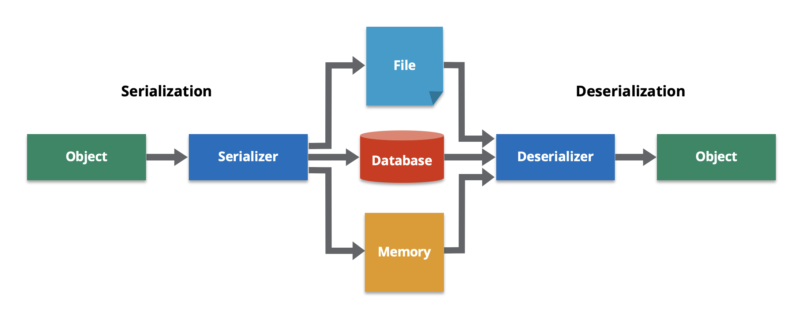

The raw transaction is serialized and splitted into chunks. The functions below extract the information from the raw transaction.

In [13]:
from io import BytesIO
from tx import Tx
from script import Script

hex_transaction = '010000000456919960ac691763688d3d3bcea9ad6ecaf875df5339e148a1fc61c6ed7a069e010000006a47304402204585bcdef85e6b1c6af5c2669d4830ff86e42dd205c0e089bc2a821657e951c002201024a10366077f87d6bce1f7100ad8cfa8a064b39d4e8fe4ea13a7b71aa8180f012102f0da57e85eec2934a82a585ea337ce2f4998b50ae699dd79f5880e253dafafb7feffffffeb8f51f4038dc17e6313cf831d4f02281c2a468bde0fafd37f1bf882729e7fd3000000006a47304402207899531a52d59a6de200179928ca900254a36b8dff8bb75f5f5d71b1cdc26125022008b422690b8461cb52c3cc30330b23d574351872b7c361e9aae3649071c1a7160121035d5c93d9ac96881f19ba1f686f15f009ded7c62efe85a872e6a19b43c15a2937feffffff567bf40595119d1bb8a3037c356efd56170b64cbcc160fb028fa10704b45d775000000006a47304402204c7c7818424c7f7911da6cddc59655a70af1cb5eaf17c69dadbfc74ffa0b662f02207599e08bc8023693ad4e9527dc42c34210f7a7d1d1ddfc8492b654a11e7620a0012102158b46fbdff65d0172b7989aec8850aa0dae49abfb84c81ae6e5b251a58ace5cfeffffffd63a5e6c16e620f86f375925b21cabaf736c779f88fd04dcad51d26690f7f345010000006a47304402200633ea0d3314bea0d95b3cd8dadb2ef79ea8331ffe1e61f762c0f6daea0fabde022029f23b3e9c30f080446150b23852028751635dcee2be669c2a1686a4b5edf304012103ffd6f4a67e94aba353a00882e563ff2722eb4cff0ad6006e86ee20dfe7520d55feffffff0251430f00000000001976a914ab0c0b2e98b1ab6dbf67d4750b0a56244948a87988ac005a6202000000001976a9143c82d7df364eb6c75be8c80df2b3eda8db57397088ac46430600'
# convert the hex_transaction to binary
# create a stream using BytesIO
# use Tx.parse to get the transacton object.
# ScriptSig from second input
# ScriptPubKey from first output
# Amount from second output
stream = BytesIO(bytes.fromhex(hex_transaction))
tx_obj= Tx.parse(stream)
tx_obj

tx: ee51510d7bbabe28052038d1deb10c03ec74f06a79e21913c6fcf48d56217c87
version: 1
tx_ins:
9e067aedc661fca148e13953df75f8ca6eada9ce3b3d8d68631769ac60999156:1
d37f9e7282f81b7fd3af0fde8b462a1c28024f1d83cf13637ec18d03f4518feb:0
75d7454b7010fa28b00f16cccb640b1756fd6e357c03a3b81b9d119505f47b56:0
45f3f79066d251addc04fd889f776c73afab1cb22559376ff820e6166c5e3ad6:1
tx_outs:
1000273:OP_DUP OP_HASH160 ab0c0b2e98b1ab6dbf67d4750b0a56244948a879 OP_EQUALVERIFY OP_CHECKSIG
40000000:OP_DUP OP_HASH160 3c82d7df364eb6c75be8c80df2b3eda8db573970 OP_EQUALVERIFY OP_CHECKSIG
locktime: 410438

<img src="./fig/p2pkh_static.png" width="600">

<img src="./fig/p2pkh.gif" width="800">

How the signature looks like:

In [14]:
print(tx_obj.tx_ins[1].script_sig)

304402207899531a52d59a6de200179928ca900254a36b8dff8bb75f5f5d71b1cdc26125022008b422690b8461cb52c3cc30330b23d574351872b7c361e9aae3649071c1a71601 035d5c93d9ac96881f19ba1f686f15f009ded7c62efe85a872e6a19b43c15a2937


How the locking script looks like:

In [15]:
print(tx_obj.tx_outs[0].script_pubkey)

OP_DUP OP_HASH160 ab0c0b2e98b1ab6dbf67d4750b0a56244948a879 OP_EQUALVERIFY OP_CHECKSIG


How much is transacted?

In [5]:
print(tx_obj.tx_outs[1].amount)

40000000


The first transaction has no previous unspent output that is being consumed, so the input is not unlocking anything. So what’s in the ScriptSig?

In [37]:
from io import BytesIO
from script import Script
stream = BytesIO(bytes.fromhex('4d04ffff001d0104455468652054696d65732030332f4a616e2f32303039204368616e63656c6c6f72206f6e206272696e6b206f66207365636f6e64206261696c6f757420666f722062616e6b73'))
s = Script.parse(stream)
print(s.cmds[2])

b'The Times 03/Jan/2009 Chancellor on brink of second bailout for banks'



### How to send Bitcoin through test net

Send BTC via Testnet

The construction of a transaction requires answering some basic questions:
1. Where do we want the bitcoins to go?
2. What UTXOs can we spend?
3. How quickly do we want this transaction to get into the blockchain?

1- Create (a couple) of addresses Testnet-compatible
2- Ask for some testnet BTC from faucets
3- Compile the transaction
4-Sign it
5- Send it

#### Generate private and public keys

<img src="./fig/keys.png" width="800">

<img src="./fig/key_gen.png" width="400">

In [16]:
from ecc import PrivateKey
from helper import hash256, little_endian_to_int
secret = little_endian_to_int(hash256(b'yichen'))
private_key = PrivateKey(secret)
print(private_key.point.address(testnet=True))

n1cBSKiMxpfFweAm2djpGiiCmiXbscunmd


In [54]:
secret

16490188419992584067838663994977473232859427080090277334328819525701179578805

In [18]:
from ecc import PrivateKey
from helper import hash256, little_endian_to_int
secret = little_endian_to_int(hash256(b'honglin'))
private_key = PrivateKey(secret)
print(private_key.point.address(testnet=True))

muz5BuRTgbmxZTo6gfbEPe9k1dG9ioK7yC


We need to get some testnet bitcoin:

https://coinfaucet.eu/en/btc-testnet/

https://bitcoinfaucet.uo1.net/ 

Check if we receive the bitcoin:

https://live.blockcypher.com/btc/

Some of the testnet bitcoins will go to your address, the rest will go back to the faucet address.


1 BTC = 100000000 satoshis

In [22]:
from helper import decode_base58, SIGHASH_ALL
from script import p2pkh_script, Script
from tx import TxIn, TxOut, Tx
prev_tx = bytes.fromhex('f1bea97c3cde0e218be87e9941688647876c54a4a5dabc940b2592f391083288')
# Make sure that you are using the correct unspent
prev_index = 1
tx_in = TxIn(prev_tx, prev_index)
tx_outs = []
# Specify the change, and where it goes
change_amount = int(1483635)
change_h160 = decode_base58('muz5BuRTgbmxZTo6gfbEPe9k1dG9ioK7yC')
change_script = p2pkh_script(change_h160)
change_output = TxOut(amount=change_amount, script_pubkey=change_script)
# Specify the target amount and who gets it
target_amount = int(10000)
target_h160 = decode_base58('n1cBSKiMxpfFweAm2djpGiiCmiXbscunmd')
target_script = p2pkh_script(target_h160)
target_output = TxOut(amount=target_amount, script_pubkey=target_script)
tx_obj = Tx(1, [tx_in], [change_output, target_output], 0, True)
print(tx_obj)

tx: 64807b30cd309d6b7ef2742b41cfd337ff3726e9ced3c1eed707785e4041075b
version: 1
tx_ins:
f1bea97c3cde0e218be87e9941688647876c54a4a5dabc940b2592f391083288:1
tx_outs:
1483635:OP_DUP OP_HASH160 9eb2bf2a879ecad3cc724171148647630ac20c30 OP_EQUALVERIFY OP_CHECKSIG
10000:OP_DUP OP_HASH160 dc5f90fca1b80e79b26a7bee6a0a15792d0ca1f7 OP_EQUALVERIFY OP_CHECKSIG
locktime: 0


<img src="./fig/txn.png" width="700">

<img src="./fig/fees.png" width="400">

Provide the secret from the unspent output

In [23]:
from ecc import PrivateKey
from helper import SIGHASH_ALL
z = tx_obj.sig_hash(0)
private_key = PrivateKey(secret=16490188419992584067838663994977473232859427080090277334328819525701179578805)
der = private_key.sign(z).der()
sig = der + SIGHASH_ALL.to_bytes(1, 'big')
sec = private_key.point.sec()
script_sig = Script([sig, sec])
tx_obj.tx_ins[0].script_sig = script_sig 
print(tx_obj.serialize().hex())

010000000188320891f392250b94bcdaa5a4546c8747866841997ee88b210ede3c7ca9bef1010000006b483045022100ebb8ad5c952480f6313daeddee0c60d5f5ac068089ad855319e5e52ec0f30f1d02200cd860a7a996d1861e2dacf60bbcdd1cc3dc27532a9c1f4d93cbe7f54a8c8d8a0121029beb37ebc376a14418f372d91838d7f5d1487d6b615e7519207d1e134ec5c807ffffffff0273a31600000000001976a9149eb2bf2a879ecad3cc724171148647630ac20c3088ac10270000000000001976a914dc5f90fca1b80e79b26a7bee6a0a15792d0ca1f788ac00000000


Go to the testnet and broadcast the transaction: https://live.blockcypher.com/btc/pushtx/

In [16]:
from helper import decode_base58, SIGHASH_ALL
from script import p2pkh_script, Script
from tx import TxIn, TxOut, Tx
prev_tx = bytes.fromhex('0d6fe5213c0b3291f208cba8bfb59b7476dffacc4e5cb66f6eb20a080843a299')
prev_index = 13
tx_in = TxIn(prev_tx, prev_index)
tx_outs = []
change_amount = int(0.33*100000000)
change_h160 = decode_base58('mzx5YhAH9kNHtcN481u6WkjeHjYtVeKVh2')
change_script = p2pkh_script(change_h160)
change_output = TxOut(amount=change_amount, script_pubkey=change_script)
target_amount = int(0.1*100000000)
target_h160 = decode_base58('mnrVtF8DWjMu839VW3rBfgYaAfKk8983Xf')
target_script = p2pkh_script(target_h160)
target_output = TxOut(amount=target_amount, script_pubkey=target_script)
tx_obj = Tx(1, [tx_in], [change_output, target_output], 0, True)
print(tx_obj)

tx: cd30a8da777d28ef0e61efe68a9f7c559c1d3e5bcd7b265c850ccb4068598d11
version: 1
tx_ins:
0d6fe5213c0b3291f208cba8bfb59b7476dffacc4e5cb66f6eb20a080843a299:13
tx_outs:
33000000:OP_DUP OP_HASH160 d52ad7ca9b3d096a38e752c2018e6fbc40cdf26f OP_EQUALVERIFY OP_CHECKSIG
10000000:OP_DUP OP_HASH160 507b27411ccf7f16f10297de6cef3f291623eddf OP_EQUALVERIFY OP_CHECKSIG
locktime: 0


In [17]:
from ecc import PrivateKey
from helper import SIGHASH_ALL
z = tx_obj.sig_hash(0)
private_key = PrivateKey(secret=8675309)
der = private_key.sign(z).der()
sig = der + SIGHASH_ALL.to_bytes(1, 'big')
sec = private_key.point.sec()
script_sig = Script([sig, sec])
tx_obj.tx_ins[0].script_sig = script_sig 
print(tx_obj.serialize().hex())

010000000199a24308080ab26e6fb65c4eccfadf76749bb5bfa8cb08f291320b3c21e56f0d0d0000006b4830450221008ed46aa2cf12d6d81065bfabe903670165b538f65ee9a3385e6327d80c66d3b502203124f804410527497329ec4715e18558082d489b218677bd029e7fa306a72236012103935581e52c354cd2f484fe8ed83af7a3097005b2f9c60bff71d35bd795f54b67ffffffff02408af701000000001976a914d52ad7ca9b3d096a38e752c2018e6fbc40cdf26f88ac80969800000000001976a914507b27411ccf7f16f10297de6cef3f291623eddf88ac00000000
